# 不定积分过程生成器（By Mathematica）

## 安装 Rubi 库 (Install Rubi)

对于 $\geqslant$ 11.3 的版本，可直接运行

In [ ]:
ResourceFunction["GitHubInstall"]["RuleBasedIntegration", "Rubi"]

版本低的就下载这个 https://github.com/RuleBasedIntegration/Rubi/releases/download/4.16.1.0/Rubi-4.16.1.0.paclet
然后运行

In [ ]:
PacletInstall["PATH to .paclet"]

## 然后，运行下面的代码 (Run following codes)

In [ ]:
<<Rubi`
IntWithStepsOfTeXForm[expr_, var_]:=With[{TeX2Str = Convert`TeX`ExpressionToTeX},
Steps[Int[expr, var], RubiPrintInformation -> False] //
Flatten //
Most //
Cases[RubiIntermediateResult[x_] :> "=&" <> (TeX2Str[HoldForm @@ x]) <>"\\\\"] //
{"\\begin{aligned}", TeX2Str@HoldForm@Int[expr, var], ##&@@#, "\\end{aligned}"} & //
StringReplace[{"\\, d"->"\\, \\mathrm{d}",  "\\int" -> "\\displaystyle \\int"}] //
StringRiffle]

In [21]:
IntWithStepsOfTeXForm[Sin[x]/x^3, x]//Print
(*可能是这个的原因，https://github.com/WolframResearch/WolframLanguageForJupyter/issues/83，没法在 jupyter 显示结果*)

\begin{aligned} \displaystyle \int \frac{\sin (x)}{x^3} \, \mathrm{d}x\
 
>   =&-\frac{\sin (x)}{2 x^2}+\frac{1}{2} \displaystyle \int \frac{\cos\
 
>   (x)}{x^2} \, \mathrm{d}x\\ =&-\frac{\cos (x)}{2 x}-\frac{\sin (x)}{2\
 
>   x^2}-\frac{1}{2} \displaystyle \int \frac{\sin (x)}{x} \, \mathrm{d}x\\\
 
>   =&-\frac{\cos (x)}{2 x}-\frac{\sin (x)}{2 x^2}-\frac{\text{Si}(x)}{2}\\\
 
>   \end{aligned}


### 下面是一些解题展示，用 MaTeX 来显示输出 (Some applications)

-Graphics-
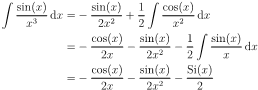

In [9]:
IntWithStepsOfTeXForm[Sin[x]/x^3, x]//MaTeX

-Graphics-
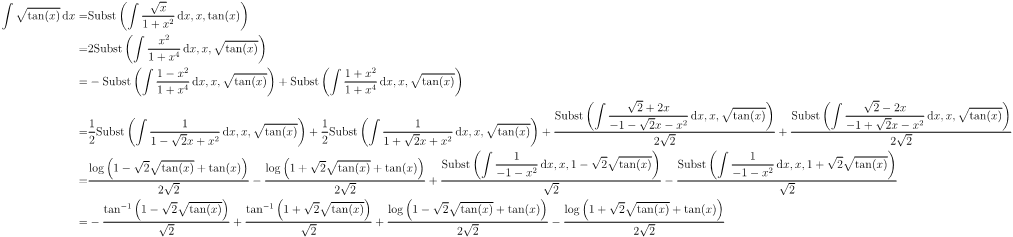

In [23]:
IntWithStepsOfTeXForm[Sqrt[Tan[x]], x] // MaTeX

-Graphics-
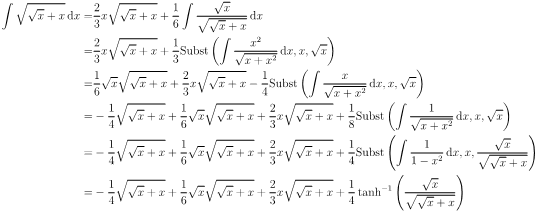

In [24]:
IntWithStepsOfTeXForm[Sqrt[x + Sqrt[x]], x] // MaTeX

-Graphics-
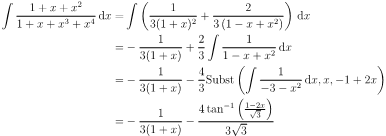

In [25]:
IntWithStepsOfTeXForm[(x^2 + x + 1)/(x^4 + x^3 + x + 1), x] // MaTeX

本文目前发在了
- [知乎](https://zhuanlan.zhihu.com/p/139362547)
- [MSE](https://mathematica.stackexchange.com/questions/221487/how-to-directly-get-the-texform-of-each-steps-from-rubi/221488#221488)
- [超理](https://chaoli.club/index.php/5300/p1#p53320)

> Mathematica 使用人数好少啊。。。